In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [70]:
df=pd.read_csv("d:\\_ANCONDA WORKSHOP\\_VAMSHI SIR\\datasets\\petrol_consumption.csv")
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
Petrol_tax                      48 non-null float64
Average_income                  48 non-null int64
Paved_Highways                  48 non-null int64
Population_Driver_licence(%)    48 non-null float64
Petrol_Consumption              48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [5]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


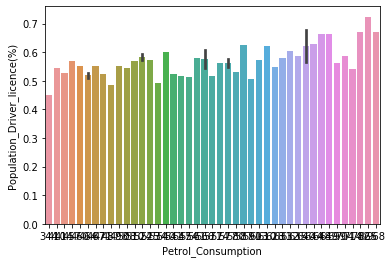

In [94]:
sns.barplot(y='Population_Driver_licence(%)',x='Petrol_Consumption',data=df)

In [7]:
a=df.corr()

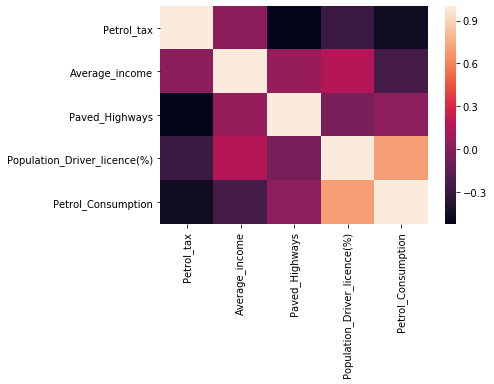

In [9]:
sns.heatmap(a,linecolor='white')

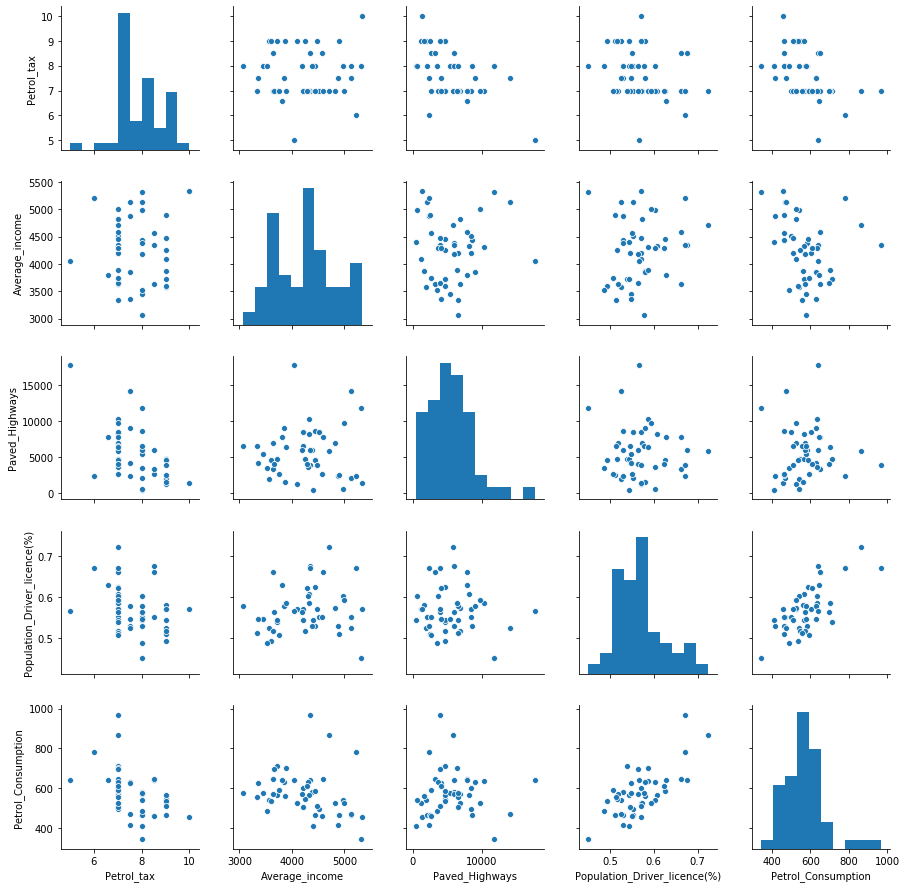

In [11]:
sns.pairplot(df)

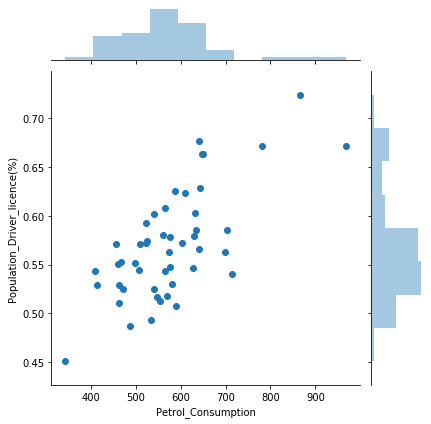

In [17]:
sns.jointplot(x='Petrol_Consumption',y='Population_Driver_licence(%)',data=df)

In [71]:
x=df.drop('Petrol_Consumption',axis=1)

In [72]:
y=df['Petrol_Consumption']

##### spliting into Training & Testing Data

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=0)

#### Feature scaling

In [75]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

#### Fitting Model

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
rfr=RandomForestRegressor(n_estimators=25,random_state=0)

In [84]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=25,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [85]:
y_pred=rfr.predict(x_test)

### Model_Evaluation

In [86]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("mean_absolute_error:",mean_absolute_error(y_test,y_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_pred))
print("root_mean_squared_error",math.sqrt(mean_squared_error(y_test,y_pred)))

mean_absolute_error: 67.38400000000001
mean_squared_error: 6513.263680000002
root_mean_squared_error 80.7047934140222


With 25 trees, the root mean squared error is 80.74 which is greater than 10 percent of the average petrol consumption i.e. 576.77. This may indicate, among other things, that we have not used enough estimators (trees).

In [87]:
rfr1=RandomForestRegressor(n_estimators=100,random_state=0)
rfr1.fit(x_train,y_train)
y_pred=rfr1.predict(x_test)

In [88]:
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 66.71699999999998
Mean Squared Error: 6741.5386499999995
Root Mean Squared Error: 82.10687334200469
